# Task 2 - Create a model to classify various types of heartbeat abnormalities.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

training_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cardio_2/mitbih_train.csv', header=None)
test_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cardio_2/mitbih_test.csv', header=None)

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [ ]:
print(training_data[187].unique())

[0. 1. 2. 3. 4.]


In [ ]:
print(training_data.shape[0])
print(test_data.shape[0])

87554
21892


In [ ]:
training_data = training_data.rename(columns={187: 'Label'})
test_data = test_data.rename(columns={187: 'Label'})

print(training_data['Label'])
print(test_data['Label'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: Label, Length: 87554, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: Label, Length: 21892, dtype: float64


[0. 1. 2. 3. 4.]
87554
21892
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: Label, Length: 87554, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: Label, Length: 21892, dtype: float64


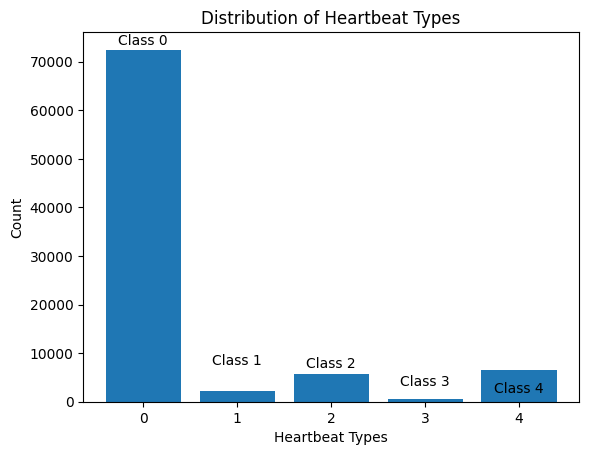

In [ ]:
# prompt: add different text to the top of each bar on the histogram

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(training_data['Label'].unique())
print(training_data.shape[0])
print(test_data.shape[0])
training_data = training_data.rename(columns={187: 'Label'})
test_data = test_data.rename(columns={187: 'Label'})

print(training_data['Label'])
print(test_data['Label'])

# Assuming 'training_data' is your DataFrame and 'Label' is the column with heartbeat types
label_counts = training_data['Label'].value_counts()

# Create bar plot
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Heartbeat Types')
plt.ylabel('Count')
plt.title('Distribution of Heartbeat Types')

# Add text above each bar
for i, count in enumerate(label_counts.values):
    plt.text(i, count + 500, 'Class ' + str(i), ha='center', va='bottom')  # Adjust position as needed

plt.show()


**K Nearest Neighbor model for multi-class classification**

In [ ]:
#imports for k-nearest neighbor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#Training data
x_train = training_data.drop(['Label'],axis=1)
y_train = training_data['Label']

#Testing data
x_test = test_data.drop(['Label'],axis=1)
y_test = test_data['Label']

#Preprocessing and fit
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_train)
data = pd.DataFrame(X_data_minmax, columns=x_train.columns)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Use sklearn algorithm to conduct k-nearest neighbor training
knn_clf = KNeighborsClassifier()
knn_clf = knn_clf.fit(x_train, y_train)
y_pred = knn_clf.predict(x_test)

In [ ]:
result = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,y_pred)

print('accuracy: ', result2)
print('precision: %.4f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.4f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.4f' % f1_score(y_test, y_pred,average='weighted'))

Confusion Matrix:
[[18021    38    45     9     5]
 [  186   357    13     0     0]
 [  113     3  1305    23     4]
 [   43     0    16   103     0]
 [   69     0    10     0  1529]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.90      0.64      0.75       556
         2.0       0.94      0.90      0.92      1448
         3.0       0.76      0.64      0.69       162
         4.0       0.99      0.95      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.91      0.82      0.86     21892
weighted avg       0.97      0.97      0.97     21892

accuracy:  0.9736433400328888
precision: 0.9727
recall: 0.9736
f1_score: 0.9725


In [ ]:
countNorm = (training_data['Label']==0).sum()
countOne = (training_data['Label']==1).sum()
countTwo = (training_data['Label']==2).sum()
countThree = (training_data['Label']==3).sum()
countFour = (training_data['Label']==4).sum()
countTotal = training_data.shape[0]
print(countTotal)

print("Normal heartbeats:    ", countNorm)
print("SV ectopic (1):       ", countOne)
print("Ventricle ectopic (2):", countTwo)
print("Fusion ectopic (3):   ", countThree)
print("Unknown (4):          ", countFour)
print('------')
print("% Normal:", countNorm/countTotal)
print("% Type 1:", countOne/countTotal)
print("% Type 2:", countTwo/countTotal)
print("% Type 3:", countThree/countTotal)
print("% Type 4:", countFour/countTotal)

87554
Normal heartbeats:     72471
SV ectopic (1):        2223
Ventricle ectopic (2): 5788
Fusion ectopic (3):    641
Unknown (4):           6431
------
% Normal: 0.8277291728533248
% Type 1: 0.025390045000799506
% Type 2: 0.06610777348836147
% Type 3: 0.007321196061858967
% Type 4: 0.07345181259565525


**Resize number of normal beats**

To address the class imbalance, I decided to take the random first 10% of normal data, and concatenate it with the rest of the abnormal data in order to train a k-nearest neighnor model.

In [ ]:
normal_training = training_data[training_data['Label'] == 0]
abnormal_training = training_data[training_data['Label'] != 0]
# print(normal_training.head())

normal_training = normal_training.sample(frac = 1)
# print(normal_training.head())

print(normal_training.index.size)
tenPercent_normal_training = normal_training.head(7247)
print(tenPercent_normal_training.index.size)

72471
7247


In [ ]:
resize_training = pd.concat([tenPercent_normal_training, abnormal_training], axis =0, ignore_index=True)

countNorm = (resize_training['Label']==0).sum()
countOne = (resize_training['Label']==1).sum()
countTwo = (resize_training['Label']==2).sum()
countThree = (resize_training['Label']==3).sum()
countFour = (resize_training['Label']==4).sum()
countTotal = resize_training.shape[0]
print(countTotal)

print("Normal heartbeats:    ", countNorm)
print("SV ectopic (1):       ", countOne)
print("Ventricle ectopic (2):", countTwo)
print("Fusion ectopic (3):   ", countThree)
print("Unknown (4):          ", countFour)
print('------')
print("% Normal:", countNorm/countTotal)
print("% Type 1:", countOne/countTotal)
print("% Type 2:", countTwo/countTotal)
print("% Type 3:", countThree/countTotal)
print("% Type 4:", countFour/countTotal)

22330
Normal heartbeats:     7247
SV ectopic (1):        2223
Ventricle ectopic (2): 5788
Fusion ectopic (3):    641
Unknown (4):           6431
------
% Normal: 0.3245409762651142
% Type 1: 0.09955217196596507
% Type 2: 0.25920286609941784
% Type 3: 0.02870577698163905
% Type 4: 0.28799820868786385


In [ ]:
#Training data AFTER resizing normal data
x_train_re = resize_training.drop(['Label'],axis=1)
y_train_re = resize_training['Label']

#Testing data
x_test_re = test_data.drop(['Label'],axis=1)
y_test_re = test_data['Label']

#Preprocessing and fit
MinMaxScaler_re = preprocessing.MinMaxScaler()
X_data_minmax_re = MinMaxScaler_re.fit_transform(x_train_re)
data_re = pd.DataFrame(X_data_minmax_re, columns=x_train_re.columns)
data_re.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.959215,0.809668,0.235650,0.000000,0.217523,0.222054,0.223565,0.246224,0.240635,0.229906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.996974,0.944024,0.591528,0.178517,0.167927,0.208775,0.193646,0.183056,0.184203,0.165783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.939326,0.773034,0.474157,0.292135,0.265169,0.235955,0.206742,0.198370,0.171009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.441860,0.037209,0.079070,0.069767,0.027907,0.074419,0.055814,0.113263,0.108544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.210366,0.329268,0.435976,0.478659,0.484756,0.509146,0.509146,0.513513,0.532074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# k-nearest neighbor training with resized normal
knn_clf_re = KNeighborsClassifier()
knn_clf_re = knn_clf_re.fit(x_train_re, y_train_re)
y_pred_re = knn_clf_re.predict(x_test)

In [ ]:
result = confusion_matrix(y_test, y_pred_re)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred_re)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,y_pred_re)
print('Accuracy:',result2)



Confusion Matrix:
[[17208   425   346    67    72]
 [  101   425    26     2     2]
 [   42    10  1366    25     5]
 [   14     2    19   127     0]
 [   30     5    15     0  1558]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     18118
         1.0       0.49      0.76      0.60       556
         2.0       0.77      0.94      0.85      1448
         3.0       0.57      0.78      0.66       162
         4.0       0.95      0.97      0.96      1608

    accuracy                           0.94     21892
   macro avg       0.76      0.88      0.81     21892
weighted avg       0.96      0.94      0.95     21892

Accuracy: 0.9448200255801206


This is better, but ideally, the goal is to have as few false negatives as possible, since a false negative could lead to a patient not receiving treatment when it is needed.

**Logistic regression**

In [ ]:
#imports for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [ ]:
lg_model = lg_model.fit(test_data.drop(['Label'],axis=1), test_data['Label'])
y_pred = lg_model.predict(test_data.drop(['Label'],axis=1))
acc = accuracy_score(test_data['Label'], y_pred)

In [ ]:
print('accuracy: ', acc)
print('precision: %.4f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.4f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.4f' % f1_score(y_test, y_pred,average='weighted'))

accuracy:  0.9115658688105244
precision: 0.9011
recall: 0.9116
f1_score: 0.8977


Once again, take the first ~20% of normal data, concatenate with all abnormal data, and use to train model to avoid class imbalance.

In [ ]:
normal_training = training_data[training_data['Label'] == 0]
abnormal_training = training_data[training_data['Label'] != 0]
# print(normal_training.head())

normal_training = normal_training.sample(frac = 1)
# print(normal_training.head())

print(normal_training.index.size)
tenPercent_normal_training = normal_training.head(15000)
print(tenPercent_normal_training.index.size)

resize_training = pd.concat([tenPercent_normal_training, abnormal_training], axis =0, ignore_index=True)

72471
15000


In [ ]:
lg_model_re = lg_model.fit(resize_training.drop(['Label'],axis=1), resize_training['Label'])
y_pred = lg_model_re.predict(test_data.drop(['Label'],axis=1))
acc = accuracy_score(test_data['Label'], y_pred)

print("Accuracy after resizing normal:", acc)

Accuracy after resizing normal: 0.876667275717157


Accuracy seems to get worse when choosing the random first percentage of normal data. However, this is not necessarily bad. The model is fed too much normal data with the full dataset, and tends to overpredict when a heartbeat will be normal, which is harmful. The accuracy drops, but the model gets closer to performing the way we would want it to.

**Logistic Regression w/ Undersampling and Oversampling**

In [ ]:
x_train = training_data.drop(['Label'],axis=1)
y_train = training_data['Label']

x_test = test_data.drop(['Label'],axis=1)
y_test = test_data['Label']

print((y_train == 0).sum())
print((y_train == 1).sum())
print((y_train == 2).sum())
print((y_train == 3).sum())
print((y_train == 4).sum())

72471
2223
5788
641
6431


In [ ]:
##Split training data into each class
training_normal = training_data[training_data['Label'] == 0]
training_one = training_data[training_data['Label'] == 1]
training_two = training_data[training_data['Label'] == 2]
training_three = training_data[training_data['Label'] == 3]
training_four = training_data[training_data['Label'] == 4]

#Shuffle all dataframes
training_normal = training_normal.sample(frac = 1)
training_one = training_one.sample(frac = 1)
training_two = training_two.sample(frac = 1)
training_three = training_three.sample(frac = 1)
training_four = training_four.sample(frac = 1)

#Take only first 600 of each class
training_normal = training_normal.head(600)
training_one = training_one.head(600)
training_two = training_two.head(600)
training_three = training_three.head(600)
training_four = training_four.head(600)

In [ ]:
# Split training into the time series info and label
x_train_normal = training_normal.drop(['Label'],axis=1)
y_train_normal = training_normal['Label']

x_train_one = training_one.drop(['Label'],axis=1)
y_train_one = training_one['Label']

x_train_two = training_two.drop(['Label'],axis=1)
y_train_two = training_two['Label']

x_train_three = training_three.drop(['Label'],axis=1)
y_train_three = training_three['Label']

x_train_four = training_four.drop(['Label'],axis=1)
y_train_four = training_four['Label']

In [ ]:
# Concatenate x and y training back together
x_train_equal_size = pd.concat([x_train_normal, x_train_one, x_train_two, x_train_three, x_train_four], axis =0, ignore_index=True)
y_train_equal_size = pd.concat([y_train_normal, y_train_one, y_train_two, y_train_three, y_train_four], axis =0, ignore_index=True)
print(x_train_equal_size.shape)
print(y_train_equal_size.shape)
print(y_train_equal_size.unique())

(3000, 187)
(3000,)
[0. 1. 2. 3. 4.]


In [ ]:
lg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

lg_model = lg_model.fit(x_train_equal_size, y_train_equal_size)
y_pred = lg_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)

In [ ]:

result = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)

print('precision: %.4f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.4f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.4f' % f1_score(y_test, y_pred,average='weighted'))

Confusion Matrix:
[[10801  2783  2312  1606   616]
 [  115   375    30    29     7]
 [  125    58  1052   156    57]
 [   13     0     9   140     0]
 [   57     3    68    10  1470]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.60      0.74     18118
         1.0       0.12      0.67      0.20       556
         2.0       0.30      0.73      0.43      1448
         3.0       0.07      0.86      0.13       162
         4.0       0.68      0.91      0.78      1608

    accuracy                           0.63     21892
   macro avg       0.43      0.76      0.46     21892
weighted avg       0.88      0.63      0.70     21892

Accuracy: 0.6321030513429563
precision: 0.8783
recall: 0.6321
f1_score: 0.7034


In [ ]:
##Split training data into each class
training_normal = training_data[training_data['Label'] == 0]
training_one = training_data[training_data['Label'] == 1]
training_two = training_data[training_data['Label'] == 2]
training_three = training_data[training_data['Label'] == 3]
training_four = training_data[training_data['Label'] == 4]

#Shuffle all dataframes
training_normal = training_normal.sample(frac = 1)
training_one = training_one.sample(frac = 1)
training_two = training_two.sample(frac = 1)
training_three = training_three.sample(frac = 1)
training_four = training_four.sample(frac = 1)

#Take only first 1200 (or all) of each class
training_normal_two = training_normal.head(600)
training_one_two = training_one.head(1200)
training_two_two = training_two.head(1200)
training_three_two = training_three.head(641)
training_four_two = training_four.head(600)

# Split training into the time series info and label
x_train_normal_two = training_normal_two.drop(['Label'],axis=1)
y_train_normal_two = training_normal_two['Label']

x_train_one_two = training_one_two.drop(['Label'],axis=1)
y_train_one_two = training_one_two['Label']

x_train_two_two = training_two_two.drop(['Label'],axis=1)
y_train_two_two = training_two_two['Label']

x_train_three_two = training_three_two.drop(['Label'],axis=1)
y_train_three_two = training_three_two['Label']

x_train_four_two = training_four_two.drop(['Label'],axis=1)
y_train_four_two = training_four_two['Label']

# Concatenate x and y training back together
x_train_equal_size_two = pd.concat([x_train_normal_two, x_train_one_two, x_train_two_two, x_train_three_two, x_train_four_two], axis =0, ignore_index=True)
y_train_equal_size_two = pd.concat([y_train_normal_two, y_train_one_two, y_train_two_two, y_train_three_two, y_train_four_two], axis =0, ignore_index=True)
print(x_train_equal_size_two.shape)
print(y_train_equal_size_two.shape)
print(y_train_equal_size_two.unique())

lg_model_two = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

lg_model_two = lg_model_two.fit(x_train_equal_size_two, y_train_equal_size_two)
y_pred_two = lg_model_two.predict(x_test)
acc = accuracy_score(y_test, y_pred_two)

result_two = confusion_matrix(y_test, y_pred_two)
print('Confusion Matrix:')
print(result_two)
result1_two = classification_report(y_test, y_pred_two)
print('Classification Report:',)
print (result1_two)
result2_two = accuracy_score(y_test,y_pred_two)
print('Accuracy:',result2_two)

(4241, 187)
(4241,)
[0. 1. 2. 3. 4.]
Confusion Matrix:
[[7019 5700 3372 1584  443]
 [  73  420   45   14    4]
 [  47   79 1182  114   26]
 [   9    1   12  140    0]
 [  33   17  130    7 1421]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.39      0.55     18118
         1.0       0.07      0.76      0.12       556
         2.0       0.25      0.82      0.38      1448
         3.0       0.08      0.86      0.14       162
         4.0       0.75      0.88      0.81      1608

    accuracy                           0.47     21892
   macro avg       0.42      0.74      0.40     21892
weighted avg       0.88      0.47      0.55     21892

Accuracy: 0.46510140690663254


Logisitic regression may not be the best model for this training method. Despite many different attempts to address class imabalance, the logistic regression's overall accuracy drops significantly. However, the amount of abnormal heartbeats being predicted as normal significantly decreased, which is a positive aspect of this model.

**Logistic Regression with Class Weights**

Revisiting the model with higher accuracy, k-nearest neighbor, let's observe specifics in our confusion matrix.

In [ ]:
testNorm = ((test_data)['Label']==0).sum()
testOne = ((test_data)['Label']==1).sum()
testTwo = ((test_data)['Label']==2).sum()
testThree = ((test_data)['Label']==3).sum()
testFour = ((test_data)['Label']==4).sum()

countNorm = (training_data['Label']==0).sum()
countOne = (training_data['Label']==1).sum()
countTwo = (training_data['Label']==2).sum()
countThree = (training_data['Label']==3).sum()
countFour = (training_data['Label']==4).sum()
countAbnormal = countOne + countTwo + countThree + countFour
countTotal = training_data.shape[0]

print('% test false abnormals for (0):', ((38+45+9+5)/(18021+38+45+9+5))*100)
print('% test false normals for (1):', (186/testOne)*100)
print('% test false normals for (2):', (113/testTwo)*100)
print('% test false normals for (3):', (43/testThree)*100)
print('% test false normals for (4):', (69/testFour)*100)
print('------')
print('% abnormal (1):', (countOne/countAbnormal)*100)
print('% abnormal (2):', (countTwo/countAbnormal)*100)
print('% abnormal (3):', (countThree/countAbnormal)*100)
print('% abnormal (4):', (countFour/countAbnormal)*100)

% test false abnormals for (0): 0.5353791809250469
% test false normals for (1): 33.45323741007194
% test false normals for (2): 7.803867403314917
% test false normals for (3): 26.543209876543212
% test false normals for (4): 4.291044776119403
------
% abnormal (1): 14.738447258502951
% abnormal (2): 38.374328714446726
% abnormal (3): 4.249817675528741
% abnormal (4): 42.63740635152158


For heartbeat data, we want false normals to be as low as possible -- this indicates the patient has an abnormal heartbeat, but they are diagnosed as normal. False normals are proportionally the highest for type 1 and type 3, which represent the least amounts of abnormal data being trained. To resolve this, we should implement a model with class weights to ensure all classes in the data are being trained effectively.

In [ ]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#Training data

x_train_weight = training_data.drop(['Label'],axis=1)
y_train_weight = training_data['Label']

#Testing data
x_test_weight = test_data.drop(['Label'],axis=1)
y_test_weight = test_data['Label']

lr_weight = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr_weight.fit(x_train_weight, y_train_weight)

# Predicting on the test data
pred_test_weight = lr_weight.predict(x_test_weight)

#Calculating and printing the accuracy score
acc_weight = accuracy_score(y_test_weight, pred_test_weight)

print('The accuracy score for the testing data:', acc_weight)

#Ploting the confusion matrix
confusion_matrix(y_test_weight, pred_test_weight)

The accuracy score for the testing data: 0.674355929106523


array([[11735,  2113,  2390,  1396,   484],
       [  128,   368,    33,    19,     8],
       [  141,    54,  1049,   154,    50],
       [   11,     0,     9,   142,     0],
       [   47,     6,    73,    13,  1469]])

In [ ]:
print('% test false abnormals for (0):', ((2113+2390+1396+484)/(2113+2390+1396+484+11735))*100)
print('% test false normals for (1):', ((128)/(128+368+33+19+8))*100)
print('% test false normals for (2):', ((141)/(141+54+1049+154+50))*100)
print('% test false normals for (3):', ((11)/(11+9+142))*100)
print('% test false normals for (4):', ((47)/(47+6+73+13+1469))*100)

% test false abnormals for (0): 35.23015785406778
% test false normals for (1): 23.021582733812952
% test false normals for (2): 9.737569060773481
% test false normals for (3): 6.790123456790123
% test false normals for (4): 2.9228855721393034


Implementing class weights greatly increased the percent of normal heartbeats misdiagnosed as abnormal - the frequency of occurence jumped from 0.5% to over 35%. However, it also reduced the occurence of false negatives, from 33% to 23% for type (1) and from 26% to 6% for type (3).

**Neural network**

In [ ]:
#imports for neural networks
import tensorflow as tf

In [ ]:
x_train = training_data.drop(['Label'],axis=1)
y_train = training_data['Label']

x_test = test_data.drop(['Label'],axis=1)
y_test = test_data['Label']

#Change data and labels to TF tensors - 1D tensor constants
X_train = tf.constant(x_train)
Y_train = tf.constant(y_train)
X_test = tf.constant(x_test)
Y_test = tf.constant(y_test)

In [ ]:
!pip install torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 6.0 MB/s eta 0:00:00


**Convolutional Neural Network**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import backend as K

x_train = training_data.drop(['Label'], axis=1)
y_train = training_data['Label']

x_test = test_data.drop(['Label'], axis=1)
y_test = test_data['Label']

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

x_train_reshaped = np.expand_dims(x_train.values, axis=2)
x_test_reshaped = np.expand_dims(x_test.values, axis=2)

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

model = Sequential([
    Input(shape=(x_train_reshaped.shape[1], 1)),
    Conv1D(64, 3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.25),
    Conv1D(128, 3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

history = model.fit(x_train_reshaped, y_train_categorical, epochs=25, batch_size=32, validation_data=(x_test_reshaped, y_test_categorical))


Epoch 1/25
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - accuracy: 0.9000 - f1_m: 0.8976 - loss: 0.4147 - precision_m: 0.9135 - recall_m: 0.8829 - val_accuracy: 0.9479 - val_f1_m: 0.9472 - val_loss: 0.1783 - val_precision_m: 0.9482 - val_recall_m: 0.9462
Epoch 2/25
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9515 - f1_m: 0.9510 - loss: 0.1779 - precision_m: 0.9569 - recall_m: 0.9454 - val_accuracy: 0.9700 - val_f1_m: 0.9692 - val_loss: 0.1060 - val_precision_m: 0.9715 - val_recall_m: 0.9669
Epoch 3/25
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9606 - f1_m: 0.9608 - loss: 0.1435 - precision_m: 0.9644 - recall_m: 0.9573 - val_accuracy: 0.9725 - val_f1_m: 0.9728 - val_loss: 0.1022 - val_precision_m: 0.9742 - val_recall_m: 0.9714
Epoch 4/25
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9649 - f1_m: 0.9650 - loss: 0.1292 - precision_m: 0.9677 - recall_m: 0.9624 - val_accuracy: 0.9735 - val_f1_m: 0.9730 - val_loss: 0.1029 - val_precision_m: 0.9751 - v

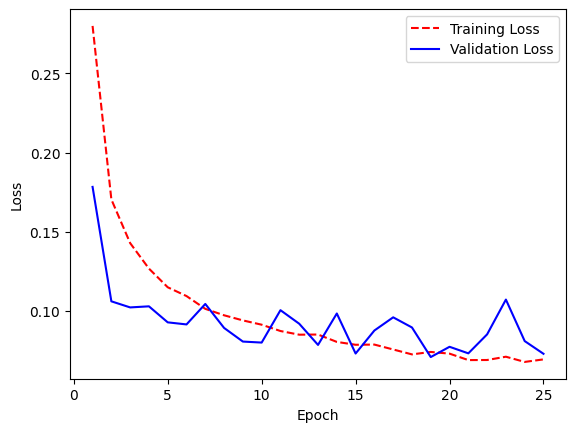

In [ ]:
training_loss = history.history['loss']
valid_loss = history.history['val_loss']

epoch_count = range(1, 26)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, valid_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

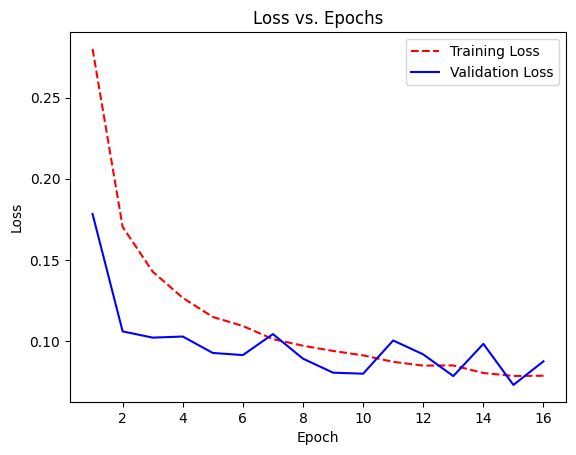

In [ ]:

import matplotlib.pyplot as plt
training_loss = history.history['loss'][:16]
valid_loss = history.history['val_loss'][:16]

epoch_count = range(1, 17)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, valid_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


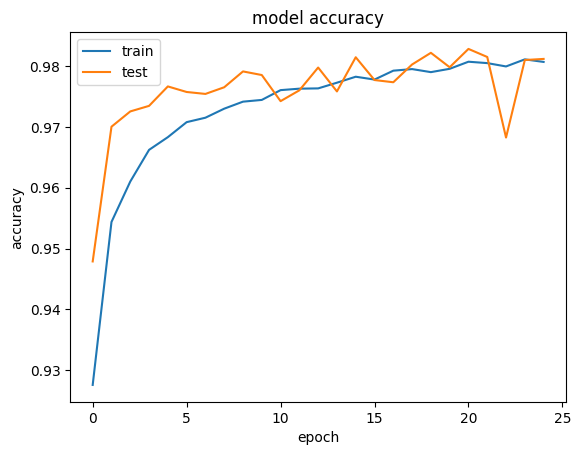

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


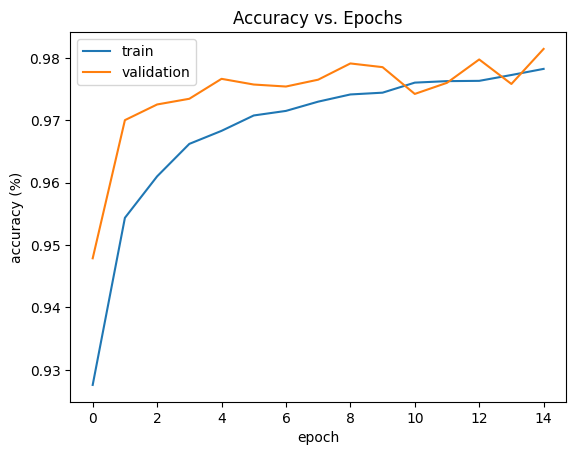

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'][:15])
plt.plot(history.history['val_accuracy'][:15])
plt.title('Accuracy vs. Epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


/content/drive/MyDrive/Colab_Notebooks/draw_convnet.py:122: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


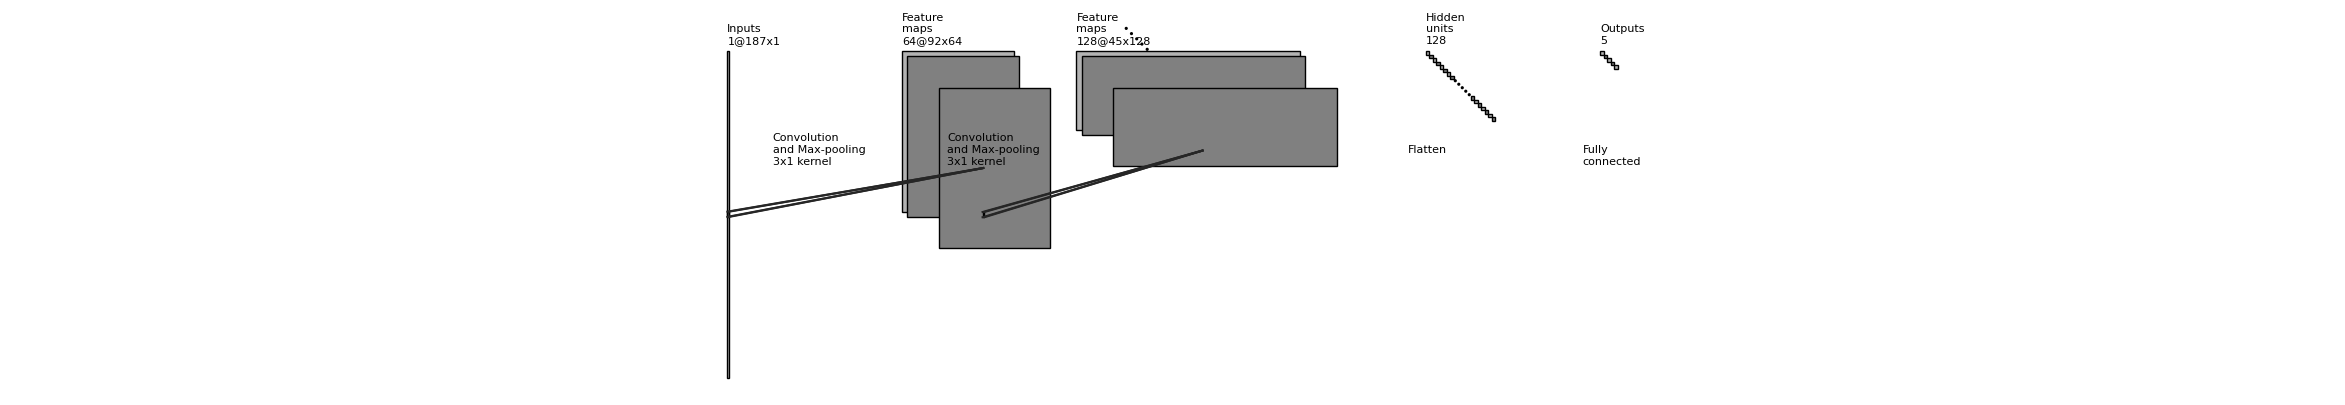

<Figure size 640x480 with 0 Axes>

In [ ]:
%run /content/drive/MyDrive/Colab_Notebooks/draw_convnet.py

In [ ]:
# # Evaluate the model using the one-hot encoded test labels
# loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_reshaped, y_test_categorical, verbose=0)
# print('Accuracy: %f' % accuracy)
# print('Precision: %f' % precision)
# print('Recall: %f' % recall)
# print('F1 score: %f' % f1_score)


685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


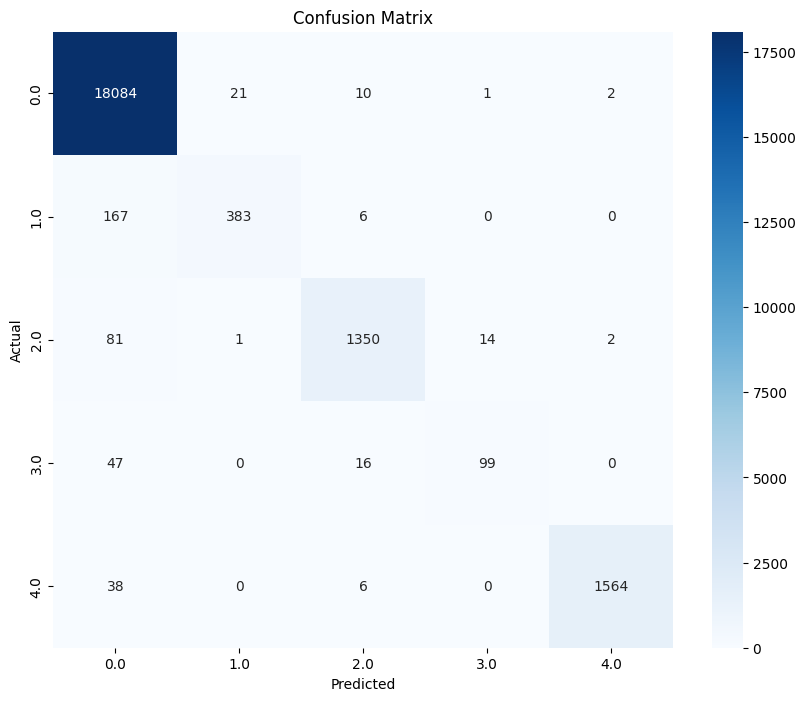

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     18118
         1.0       0.95      0.69      0.80       556
         2.0       0.97      0.93      0.95      1448
         3.0       0.87      0.61      0.72       162
         4.0       1.00      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.95      0.84      0.89     21892
weighted avg       0.98      0.98      0.98     21892



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = model.predict(x_test_reshaped)

# Convert predictions and true labels from one-hot encoded to label form
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

target_names = [str(label) for label in label_encoder.classes_]

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=target_names))

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


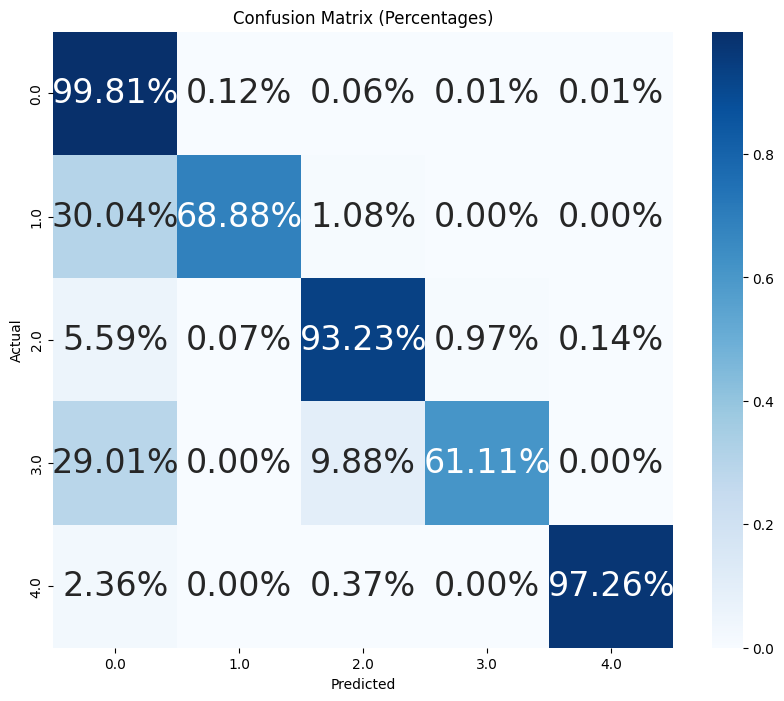

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(x_test_reshaped)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, annot_kws={"size": 24})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')
plt.show()

